In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
base = pd.read_csv(url, sep=';')
base.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


# Quantidade de linhas e colunas da base de dados

In [2]:
base.shape

(32960, 9)

# Colunas da base de dados

In [3]:
base.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

# Mostra os tipos de dados da base

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


# Quais os valores médios de aluguel por tipo de imóvel?

In [5]:
graf_media_valor = base.groupby('Tipo').mean()['Valor'].sort_values()
graf_media_valor

<ipython-input-5-72cd04cbedbd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graf_media_valor = base.groupby('Tipo').mean()['Valor'].sort_values()


Tipo
Quitinete                        1246.840909
Pousada/Chalé                    1480.000000
Casa de Vila                     1574.369478
Box/Garagem                      1899.756098
Studio                           2400.000000
Loft                             2557.882353
Flat                             4546.189076
Apartamento                      4744.614648
Chácara                          4900.000000
Casa                             6793.454922
Loja Shopping/ Ct Comercial      8126.178862
Casa de Condomínio              11952.061245
Sítio                           12499.000000
Loja/Salão                      13769.646770
Casa Comercial                  14478.264151
Conjunto Comercial/Sala         14715.045521
Loteamento/Condomínio           22000.000000
Hotel                           25000.000000
Terreno Padrão                  32567.714286
Galpão/Depósito/Armazém         53407.062600
Indústria                      120000.000000
Prédio Inteiro                 498637.239203
Name:

# Qual o percentual de cada tipo de imóvel na base de dados

<Axes: ylabel='Tipo'>

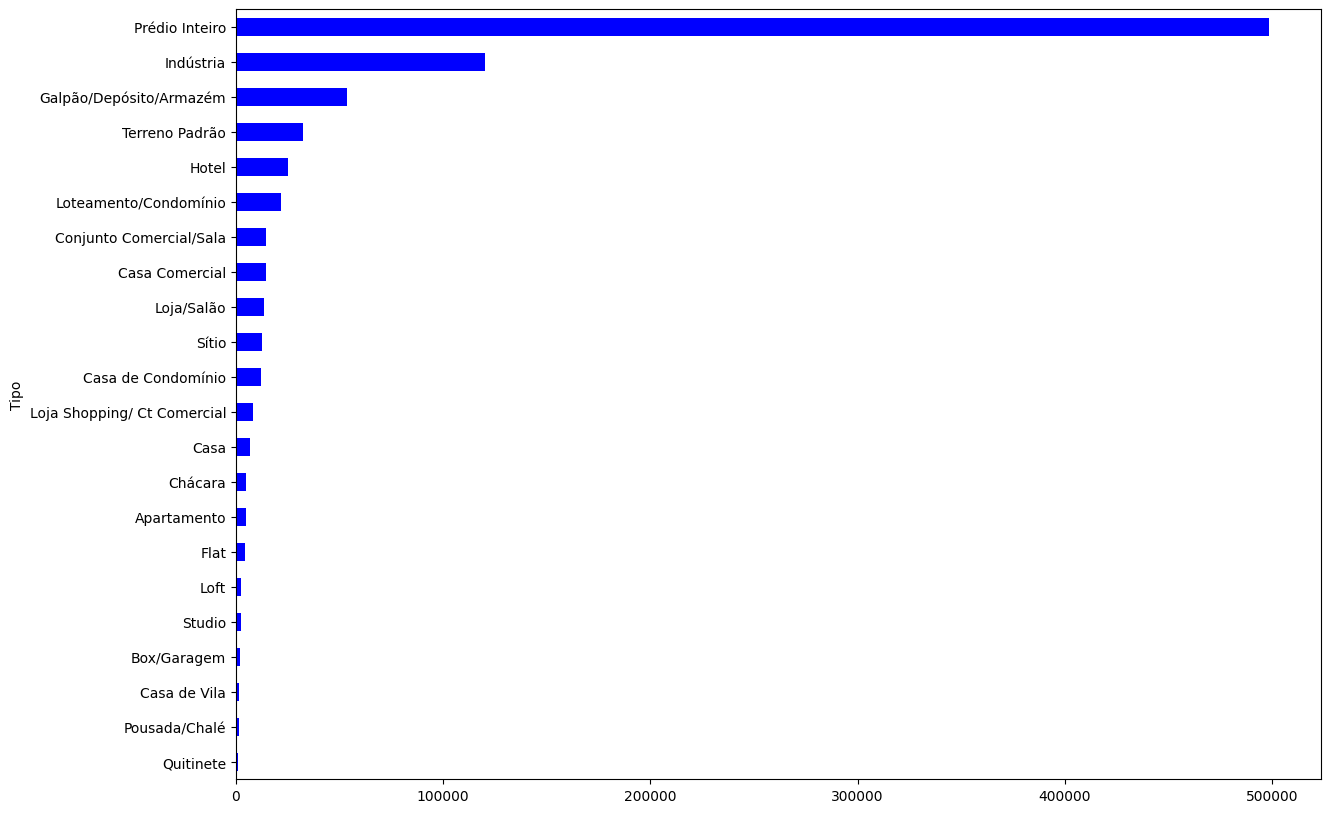

In [6]:
graf_media_valor.plot(kind='barh', figsize=(14,10), color='blue')

A empresa em questão trabalha com aluguel de imóveis residenciais. Por isso, não faz sentido a existência de imóveis comerciais na base de dados. No entanto, por fins de boas práticas, vou criar uma nova base de dados só com imóveis residencias e deixarei a base antiga salva caso ocorra a necessidade da utilização de imóveis comerciais

In [7]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
new_base = base.query('@imoveis_comerciais not in Tipo')
new_base

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


<ipython-input-8-10404a1cfcb5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  graf_tipo_valor = new_base.groupby('Tipo').mean()['Valor'].sort_values()


<Axes: ylabel='Tipo'>

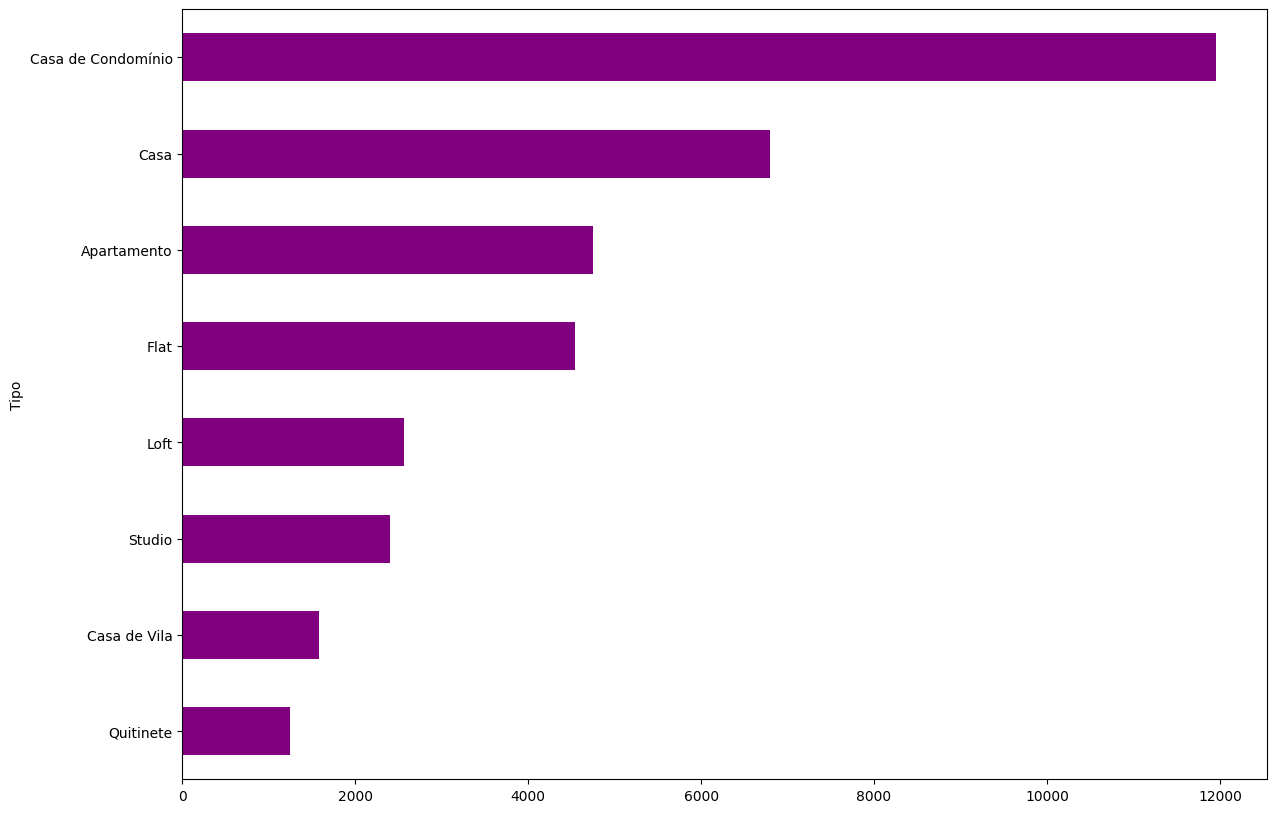

In [8]:
graf_tipo_valor = new_base.groupby('Tipo').mean()['Valor'].sort_values()
graf_tipo_valor.plot(kind='barh', figsize=(14,10), color='purple')

# Tratamento de valores nulos na base de dados

In [9]:
new_base.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1865
IPTU          6879
dtype: int64

Como os valores nulos só existem nas colunas Valor, Condominio e IPTU é incoerente substiuir esses valores por zero ou qualquer outro valor diferente de zero. Pois, poderia ocorrer um resultado inconsistente na análise de dados, a melhor opção é remover os valores nulos da base

In [10]:
new_base = new_base.dropna()
new_base.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

# Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200

In [11]:
selecao_valor_1200 = (new_base['Tipo'] == 'Apartamento') & (new_base['Quartos'] == 1) & (new_base['Valor'] < 1200)
apartamentos_valor_1200 = new_base[selecao_valor_1200]
apartamentos_valor_1200

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
148,Apartamento,Vila Isabel,1,0,0,37,1000.0,285.0,24.0
...,...,...,...,...,...,...,...,...,...
32580,Apartamento,Grajaú,1,1,0,56,1100.0,580.0,420.0
32617,Apartamento,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Apartamento,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Apartamento,Botafogo,1,0,0,21,1000.0,282.0,25.0


# Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 m².

In [12]:
selecao_valor_3000 = (new_base['Tipo'] == 'Apartamento') & (new_base['Quartos'] >= 2) & (new_base['Valor'] < 3000) & (new_base['Area'] > 70)
apartamentos_valor_3000 = new_base[selecao_valor_3000]
apartamentos_valor_3000

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
49,Apartamento,Barra da Tijuca,3,1,1,72,2350.0,600.0,70.0
51,Apartamento,Recreio dos Bandeirantes,3,1,2,92,2300.0,840.0,200.0
57,Apartamento,Recreio dos Bandeirantes,2,1,2,83,1600.0,1160.0,157.0
...,...,...,...,...,...,...,...,...,...
32933,Apartamento,Recreio dos Bandeirantes,2,1,1,105,2100.0,648.0,156.0
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0


# Salvar as análises em um arquivo csv

In [13]:
apartamentos_valor_1200.to_csv('apartamentos_valor_1200.csv', index=0, sep=';')
apartamentos_valor_3000.to_csv('apartamentos_valor_3000.csv', index=0, sep=';')

# Criação das colunas valor_por_mes e valor_por_ano. A coluna valor_por_mes, deve conter os gastos mensais de cada imóvel, incluindo aluguel e condomínio e a coluna valor_por_ano, deve conter os gastos anuais por imóvel, ou seja, IPTU mais 12 meses de aluguel e condomínio.

In [14]:
new_base['Valor_por_mes'] = new_base['Valor'] + new_base['IPTU']
new_base['Valor_por_ano'] = new_base['Valor_por_mes'] * 12
new_base.head()

<ipython-input-14-0758d24c1b68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_base['Valor_por_mes'] = new_base['Valor'] + new_base['IPTU']
<ipython-input-14-0758d24c1b68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_base['Valor_por_ano'] = new_base['Valor_por_mes'] * 12


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,1760.0,21120.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,820.0,9840.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1317.0,15804.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,1574.0,18888.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1514.0,18168.0


# Criação das colunas descricao e possui_suite. A coluna descricao, deve possuir uma sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas de garagem e a coluna possui_suite deve informar se o imóvel possui ou não suítes, sem se importar com a quantidadde

In [15]:
new_base['Descricao'] = new_base['Tipo'] + ' em ' + new_base['Bairro'] + ' com ' + \
                                        new_base['Quartos'].astype(str) + ' quarto(s) ' + \
                                        ' e ' + new_base['Vagas'].astype(str) + ' vaga(s) de garagem. '
new_base['Possui_suite'] = new_base['Suites'].apply(lambda x: 'Sim' if x >= 1 else 'Nao')
new_base

<ipython-input-15-13f83e503c24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_base['Descricao'] = new_base['Tipo'] + ' em ' + new_base['Bairro'] + ' com ' + \
<ipython-input-15-13f83e503c24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_base['Possui_suite'] = new_base['Suites'].apply(lambda x: 'Sim' if x >= 1 else 'Nao')


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,1760.0,21120.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Nao
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,820.0,9840.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Nao
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1317.0,15804.0,Apartamento em Cachambi com 2 quarto(s) e 0 v...,Nao
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,1574.0,18888.0,Apartamento em Grajaú com 2 quarto(s) e 1 vag...,Nao
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1514.0,18168.0,Apartamento em Lins de Vasconcelos com 3 quart...,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,17332.0,207984.0,Casa de Condomínio em Barra da Tijuca com 5 qu...,Sim
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,948.0,11376.0,Apartamento em Méier com 2 quarto(s) e 0 vaga...,Nao
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,825.0,9900.0,Quitinete em Centro com 0 quarto(s) e 0 vaga(...,Nao
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,1840.0,22080.0,Apartamento em Jacarepaguá com 3 quarto(s) e ...,Sim
